# Load and Explore Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn_large.csv',index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [3]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,False,False,False,False,False
Partner,True,False,False,False,False
Dependents,False,False,False,False,False
tenure,1,34,2,45,2
PhoneService,False,True,True,False,True
MultipleLines,NaN,False,False,NaN,False
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,False,True,True,True,False


In [4]:
df.shape

(5043, 21)

In [5]:
df['Churn'].value_counts()

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

# Data Preprocessing

In [7]:
df = df.drop('customerID',axis=1)

In [8]:
import numpy as np

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float64')

In [9]:
df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [10]:
df = df.dropna(subset=['Churn'])

In [11]:
df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [14]:
missing_values_cols = [col for col, na_value in df.isna().sum().items() if na_value > 0] 
for col in missing_values_cols:
    df.loc[:,col] = df[col].fillna(df[col].mode()[0])

In [15]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df['Churn'].value_counts()

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

In [17]:
df['Churn'] = df['Churn'].replace('No','False')
df['Churn'] = df['Churn'].replace('Yes','True')

In [18]:
df['Churn'].value_counts()

Churn
False    3706
True     1336
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols_to_processed = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for col in cols_to_processed:
    df[col] = encoder.fit_transform(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   int64  
 1   SeniorCitizen     5042 non-null   int64  
 2   Partner           5042 non-null   int64  
 3   Dependents        5042 non-null   int64  
 4   tenure            5042 non-null   int64  
 5   PhoneService      5042 non-null   int64  
 6   MultipleLines     5042 non-null   int64  
 7   InternetService   5042 non-null   int64  
 8   OnlineSecurity    5042 non-null   int64  
 9   OnlineBackup      5042 non-null   int64  
 10  DeviceProtection  5042 non-null   int64  
 11  TechSupport       5042 non-null   int64  
 12  StreamingTV       5042 non-null   int64  
 13  StreamingMovies   5042 non-null   int64  
 14  Contract          5042 non-null   int64  
 15  PaperlessBilling  5042 non-null   int64  
 16  PaymentMethod     5042 non-null   int64  
 17  

# Train the model

In [32]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\jayes\.vscode\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(X_test,y_test)

0.8047571853320119

# Evaluate The Model

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8047571853320119

In [38]:
cm = confusion_matrix(y_test,y_pred)

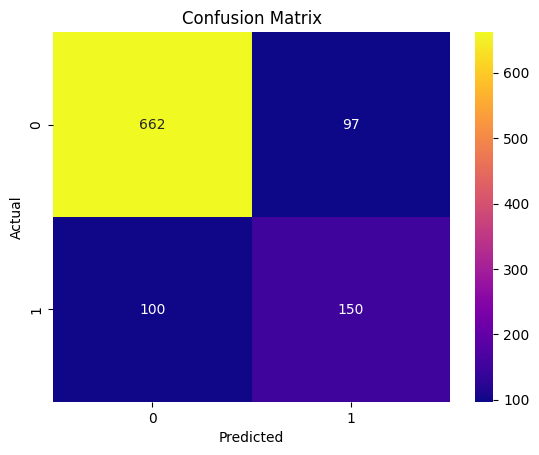

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,cmap='plasma',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       759
           1       0.61      0.60      0.60       250

    accuracy                           0.80      1009
   macro avg       0.74      0.74      0.74      1009
weighted avg       0.80      0.80      0.80      1009

